<a href="https://colab.research.google.com/github/Pickles91/intrusion-detection-system-using-decision-trees/blob/main/R2LResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intrusion Detection - R2L using Descision Trees**


****
****
Data From:

*   KDD Cup 1999 Data. (n.d.). https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
*   NSL-KDD Data. (n.d). https://www.kaggle.com/datasets/hassan06/nslkdd/data
****
****

Attacks fall into four main categories:


*   DOS: denial-of-service, e.g. syn flood;
*   R2L: unauthorized access from a remote machine, e.g. guessing password
*   U2R: unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
*   Probing: surveillance and other probing, e.g., port scanning.

This research project focuses on R2L attacks.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys
import sklearn

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/ids-using-dt/kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
# attach the column names to the dataset
col_names = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted","num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count","srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate"]

#col_names.append('target')
col_names.append('Attack Type')
print(col_names)
print(len(col_names))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Attack Type']
42


In [ ]:
#  Reading the ‘attack_types’ file.
with open("/content/drive/MyDrive/Colab Notebooks/ids-using-dt/training_attack_types.txt",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l



In [ ]:
# Creating a dictionary of attack_types
#print('--------------attacks_types------------------------')
attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

#for attack, type in attacks_types.items():
    #print(f"{attack}: {type}")

print('--------------attacks_types_r2l------------------------')

# Creating a dictionary of attack_types_r2l
attacks_types_r2l = {
    'normal': 'normal',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'multihop': 'r2l',
    'phf': 'r2l',
    'spy': 'r2l',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

for attack, type in attacks_types_r2l.items():
    print(f"{attack}: {type}")

--------------attacks_types_r2l------------------------
normal: normal
ftp_write: r2l
guess_passwd: r2l
imap: r2l
multihop: r2l
phf: r2l
spy: r2l
warezclient: r2l
warezmaster: r2l


# **Combine the dataset**

****

In [ ]:
# Load the first dataset
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ids-using-dt/kddcup.data_10_percent.gz', header=None, names = col_names)

# Load the second dataset
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ids-using-dt/KDDTrain+_2.csv', header=None, names = col_names)

combined_df = pd.concat([df1, df2])

# **Data Analysis**

## **df1**

In [ ]:
print('Attack Type     Training set:')
print(df1['Attack Type'].value_counts())

Attack Type     Training set:
Attack Type
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64


In [ ]:
# Define normal traffic
normal_traffic_df1 = df1[df1.iloc[:,41] == 'normal.']

# Define malicious traffic belonging to R2L category
ftp_write_traffic_df1 = df1[df1.iloc[:,41] == 'ftp_write.']
guess_passwd_traffic_df1 = df1[df1.iloc[:,41] == 'guess_passwd.']
imap_traffic_df1 = df1[df1.iloc[:,41] == 'imap.']
multihop_traffic_df1 = df1[df1.iloc[:,41] == 'multihop.']
phf_traffic_df1 = df1[df1.iloc[:,41] == 'phf.']
warezclient_traffic_df1 = df1[df1.iloc[:,41] == 'warezclient.']
warezmaster_traffic_df2 = df1[df1.iloc[:,41] == 'warezmaster.']

# Print the number of records in each dataframe1
print('Normal = ', normal_traffic_df1.shape[0], ' records')
print('ftp_write = ', ftp_write_traffic_df1.shape[0], ' records')
print('guess_passwd = ', guess_passwd_traffic_df1.shape[0], ' records')
print('imap = ', imap_traffic_df1.shape[0], ' records')
print('multihop traffic = ', multihop_traffic_df1.shape[0], ' records')
print('phf traffic = ', phf_traffic_df1.shape[0], ' records')
print('warezclient traffic = ', warezclient_traffic_df1.shape[0], ' records')
print('warezmaster traffic = ', warezmaster_traffic_df2.shape[0], ' records')


df1.head()

Normal =  97278  records
ftp_write =  8  records
guess_passwd =  53  records
imap =  12  records
multihop traffic =  7  records
phf traffic =  4  records
warezclient traffic =  1020  records
warezmaster traffic =  20  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df1.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **df2**

In [ ]:
print('Attack Type     Training set:')
print(df2['Attack Type'].value_counts())

Attack Type     Training set:
Attack Type
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [ ]:
# Define normal traffic
normal_traffic_df2 = df2[df2.iloc[:, 41] == 'normal']

# Define malicious traffic belonging to R2L category
ftp_write_traffic_df2 = df2[df2.iloc[:,41] == 'ftp_write']
guess_passwd_traffic_df2 = df2[df2.iloc[:,41] == 'guess_passwd']
imap_traffic_df2 = df2[df2.iloc[:,41] == 'imap']
multihop_traffic_df2 = df2[df2.iloc[:,41] == 'multihop']
phf_traffic_df2 = df2[df2.iloc[:,41] == 'phf']
warezclient_traffic_df2 = df2[df2.iloc[:,41] == 'warezclient']
warezmaster_traffic_df2 = df2[df2.iloc[:,41] == 'warezmaster']

# Print the number of records in each dataframe2
print('Normal traffic df2 = ', normal_traffic_df2.shape[0], ' records')
print('ftp_write = ', ftp_write_traffic_df2.shape[0], ' records')
print('guess_passwd = ', guess_passwd_traffic_df2.shape[0], ' records')
print('imap = ', imap_traffic_df2.shape[0], ' records')
print('multihop traffic = ', multihop_traffic_df2.shape[0], ' records')
print('phf traffic = ', phf_traffic_df2.shape[0], ' records')
print('warezclient traffic = ', warezclient_traffic_df2.shape[0], ' records')
print('warezmaster traffic = ', warezmaster_traffic_df2.shape[0], ' records')

df2.head()

Normal traffic df2 =  67343  records
ftp_write =  8  records
guess_passwd =  53  records
imap =  11  records
multihop traffic =  7  records
phf traffic =  4  records
warezclient traffic =  890  records
warezmaster traffic =  20  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df2.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **combined_df**

In [ ]:
print('Attack Type     Training set:')
print(combined_df['Attack Type'].value_counts())

Attack Type     Training set:
Attack Type
smurf.              280790
neptune.            107201
normal.              97278
normal               67343
neptune              41214
satan                 3633
ipsweep               3599
portsweep             2931
smurf                 2646
back.                 2203
satan.                1589
nmap                  1493
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
back                   956
teardrop               892
warezclient            890
pod.                   264
nmap.                  231
pod                    201
guess_passwd            53
guess_passwd.           53
buffer_overflow         30
buffer_overflow.        30
land.                   21
warezmaster.            20
warezmaster             20
land                    18
imap.                   12
imap                    11
rootkit.                10
rootkit                 10
loadmodule.              9
loadmodule   

In [ ]:
# Define normal traffic
normal_traffic_combined = combined_df[(combined_df.iloc[:, 41] == 'normal') | (combined_df.iloc[:, 41] == 'normal.')]

# Define malicious traffic belonging to R2L category
ftp_write_traffic_combined = combined_df[(combined_df.iloc[:, 41] == 'ftp_write') | (combined_df.iloc[:, 41] == 'ftp_write.')]
guess_passwd_traffic_combined = combined_df[(combined_df.iloc[:, 41] == 'guess_passwd') | (combined_df.iloc[:, 41] == 'guess_passwd.')]
imap_traffic_combined = combined_df[(combined_df.iloc[:, 41] == 'imap') | (combined_df.iloc[:, 41] == 'imap.')]
multihop_traffic_combined = combined_df[(combined_df.iloc[:, 41] == 'multihop') | (combined_df.iloc[:, 41] == 'multihop.')]
phf_traffic_combined = combined_df[(combined_df.iloc[:, 41] == 'phf') | (combined_df.iloc[:, 41] == 'phf.')]
warezclient_traffic_combined = combined_df[(combined_df.iloc[:, 41] == 'warezclient') | (combined_df.iloc[:, 41] == 'warezclient.')]
warezmaster_traffic_combined = combined_df[(combined_df.iloc[:, 41] == 'warezmaster') | (combined_df.iloc[:, 41] == 'warezmaster.')]

# Print the number of records in each dataframe1
print('Normal = ', normal_traffic_combined.shape[0], ' records')
print('ftp_write = ', ftp_write_traffic_combined.shape[0], ' records')
print('guess_passwd = ', guess_passwd_traffic_combined.shape[0], ' records')
print('imap = ', imap_traffic_combined.shape[0], ' records')
print('multihop traffic = ', multihop_traffic_combined.shape[0], ' records')
print('phf traffic = ', phf_traffic_combined.shape[0], ' records')
print('warezclient traffic = ', warezclient_traffic_combined.shape[0], ' records')
print('warezmaster traffic = ', warezmaster_traffic_combined.shape[0], ' records')

combined_df.head()

Normal =  164621  records
ftp_write =  16  records
guess_passwd =  106  records
imap =  23  records
multihop traffic =  14  records
phf traffic =  8  records
warezclient traffic =  1910  records
warezmaster traffic =  40  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
combined_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,619994.000000,6.199940e+05,6.199940e+05,619994.000000,619994.000000,619994.000000,619994.000000,619994.000000,619994.000000,619994.000000,...,619994.000000,619994.000000,619994.000000,619994.000000,619994.000000,619994.000000,619994.000000,619994.000000,619994.000000,619994.000000
mean,96.573928,1.166930e+04,4.710864e+03,0.000076,0.009736,0.000034,0.069038,0.000369,0.198533,0.064876,...,222.246175,173.830648,0.706532,0.041481,0.509779,0.011938,0.198637,0.197176,0.070454,0.070177
std,1336.667907,2.789317e+06,1.812876e+06,0.008706,0.166081,0.008132,1.196352,0.024656,0.398896,10.911343,...,75.828104,110.963711,0.429142,0.131158,0.487128,0.064009,0.396855,0.397064,0.249117,0.252146
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,19.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Shape

In [ ]:
df1.shape
print('df1.shape = ', df1.shape,)

df2.shape
print('df2.shape = ', df2.shape,)

combined_df.shape
print('combined_df.shape = ', combined_df.shape,)

df1.shape =  (494021, 42)
df2.shape =  (125973, 42)
combined_df.shape =  (619994, 42)


# **Data Preprocessing**
****
Requirement for One-Hot-encoding:
"The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features. The output will be a sparse matrix where each column corresponds to one possible value of one feature. It is assumed that input features take on values in the range [0, n_values)."

Therefore the features first need to be transformed with LabelEncoder, to transform every category to a number.

In [ ]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
for col_name in df1.columns:
    if df1[col_name].dtypes == 'object' :
        unique_cat = len(df1[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

for col_name in df2.columns:
    if df2[col_name].dtypes == 'object' :
        unique_cat = len(df2[col_name].unique())

for col_name in combined_df.columns:
    if combined_df[col_name].dtypes == 'object' :
        unique_cat = len(combined_df[col_name].unique())

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service for df1:')
print(df1['service'].value_counts().sort_values(ascending=False).head())

print()
print('Distribution of categories in service for df2:')
print(df2['service'].value_counts().sort_values(ascending=False).head())

print()
print('Distribution of categories in service for combined_df:')
print(combined_df['service'].value_counts().sort_values(ascending=False).head())

Feature 'protocol_type' has 3 categories
Feature 'service' has 66 categories
Feature 'flag' has 11 categories
Feature 'Attack Type' has 23 categories

Distribution of categories in service for df1:
service
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
Name: count, dtype: int64

Distribution of categories in service for df2:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64

Distribution of categories in service for combined_df:
service
ecr_i       284477
private     132746
http        104631
smtp         17036
domain_u     14906
Name: count, dtype: int64


In [ ]:
#  Finding missing values of all features.
combined_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Finding categorical features
num_cols_combined = combined_df._get_numeric_data().columns

cate_cols_combined = list(set(combined_df.columns)-set(num_cols_combined))
cate_cols_combined.remove('Attack Type')

cate_cols_combined

['flag', 'protocol_type', 'service']

Non-numeric columns: Index(['Attack Type', 'flag', 'protocol_type', 'service'], dtype='object')
Correlation matrix calculated successfully.


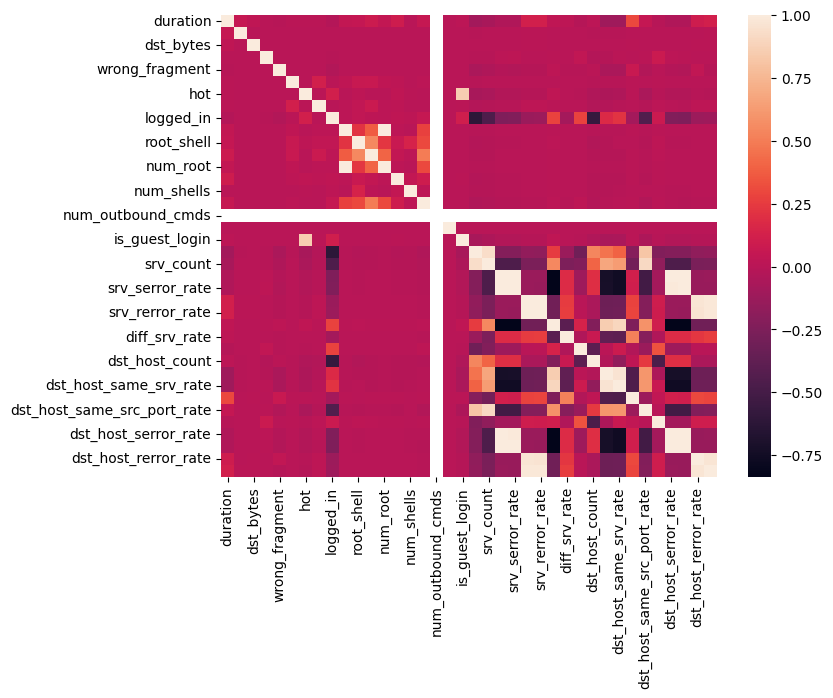

In [ ]:
# Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

# Drop non-numeric columns
combined_df_numeric = combined_df.select_dtypes(include=['number'])

# Check for non-numeric columns
non_numeric_columns = combined_df.columns.difference(combined_df_numeric.columns)
print("Non-numeric columns:", non_numeric_columns)

# Now, calculate correlation
corr = combined_df_numeric.corr()
print("Correlation matrix calculated successfully.")


plt.figure(figsize =(8, 6))
sns.heatmap(corr)
plt.show()

In [ ]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
combined_df.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
combined_df.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
combined_df.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
combined_df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
combined_df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
combined_df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
combined_df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
combined_df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

In [ ]:
# Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’.
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df1['protocol_type'] = df1['protocol_type'].map(pmap)

# Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’.
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df2['protocol_type'] = df2['protocol_type'].map(pmap)

# Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’.
pmap = {'icmp':0, 'tcp':1, 'udp':2}
combined_df['protocol_type'] = combined_df['protocol_type'].map(pmap)

In [ ]:
# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df1['flag'] = df1['flag'].map(fmap)

# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df2['flag'] = df2['flag'].map(fmap)

# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
combined_df['flag'] = combined_df['flag'].map(fmap)

In [ ]:
# Remove irrelevant features such as ‘service’ before modelling
df1.drop('service', axis = 1, inplace = True)
df2.drop('service', axis = 1, inplace = True)
combined_df.drop('service', axis = 1, inplace = True)

In [ ]:
# splitting the dataset of only the normal and R2L attacks then train the dataset.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Separate the normal and R2L attack records
normal_r2l_df1 = df1[df1['Attack Type'].isin(['normal.', 'ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'])]

# Separate the features and target labels
X_r2l_df1 = normal_r2l_df1.drop('Attack Type', axis=1)
y_r2l_df1 = normal_r2l_df1['Attack Type']

# Split the data into training and testing sets
X_train_r2l_df1, X_test_r2l_df1, y_train_r2l_df1, y_test_r2l_df1 = train_test_split(X_r2l_df1, y_r2l_df1, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Information about df1")
print(f"Shape of X_train_r2l_df1: {X_train_r2l_df1.shape}")
print(f"Shape of X_test_r2l_df1: {X_test_r2l_df1.shape}")
print(f"Shape of y_train_r2l_df1: {y_train_r2l_df1.shape}")
print(f"Shape of y_test_r2l_df1: {y_test_r2l_df1.shape}")

Information about df1
Shape of X_train_r2l_df1: (68882, 40)
Shape of X_test_r2l_df1: (29522, 40)
Shape of y_train_r2l_df1: (68882,)
Shape of y_test_r2l_df1: (29522,)


In [ ]:
# splitting the dataset of only the normal and R2L attacks then train the dataset.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Separate the normal and R2L attack records
normal_r2l_df2 = df2[df2['Attack Type'].isin(['normal', 'ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster'])]

# Separate the features and target labels
X_r2l_df2 = normal_r2l_df2.drop('Attack Type', axis=1)
y_r2l_df2 = normal_r2l_df2['Attack Type']

# Split the data into training and testing sets
X_train_r2l_df2, X_test_r2l_df2, y_train_r2l_df2, y_test_r2l_df2 = train_test_split(X_r2l_df2, y_r2l_df2, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Information about df2")
print(f"Shape of X_train_r2l_df2: {X_train_r2l_df2.shape}")
print(f"Shape of X_test_r2l_df2: {X_test_r2l_df2.shape}")
print(f"Shape of y_train_r2l_df2: {y_train_r2l_df2.shape}")
print(f"Shape of y_test_r2l_df2: {y_test_r2l_df2.shape}")

Information about df2
Shape of X_train_r2l_df2: (47836, 40)
Shape of X_test_r2l_df2: (20502, 40)
Shape of y_train_r2l_df2: (47836,)
Shape of y_test_r2l_df2: (20502,)


In [ ]:
# splitting the dataset of only the normal and R2L attacks then train the dataset.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Separate the normal and R2L attack records
normal_r2l_combined_df = combined_df [combined_df ['Attack Type'].isin(['normal.', 'ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'])]

# Separate the features and target labels
X_r2l_combined_df = normal_r2l_combined_df.drop('Attack Type', axis=1)
y_r2l_combined_df = normal_r2l_combined_df['Attack Type']

# Split the data into training and testing sets
X_train_r2l_combined_df, X_test_r2l_combined_df, y_train_r2l_combined_df, y_test_r2l_combined_df = train_test_split(X_r2l_combined_df, y_r2l_combined_df, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Information about combined_df")
print(f"Shape of X_train_r2l_combined_df: {X_train_r2l_combined_df.shape}")
print(f"Shape of X_test_r2l_combined_df: {X_test_r2l_combined_df.shape}")
print(f"Shape of y_train_r2l_combined_df1: {y_train_r2l_combined_df.shape}")
print(f"Shape of y_test_r2l_combined_df: {y_test_r2l_combined_df.shape}")

Information about combined_df
Shape of X_train_r2l_combined_df: (68882, 32)
Shape of X_test_r2l_combined_df: (29522, 32)
Shape of y_train_r2l_combined_df1: (68882,)
Shape of y_test_r2l_combined_df: (29522,)


# **Descision Trees Classifier**

****

## **df1**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Accuracy df1: 0.998969
Accuracy of R2L attacks for df1: 0.999187


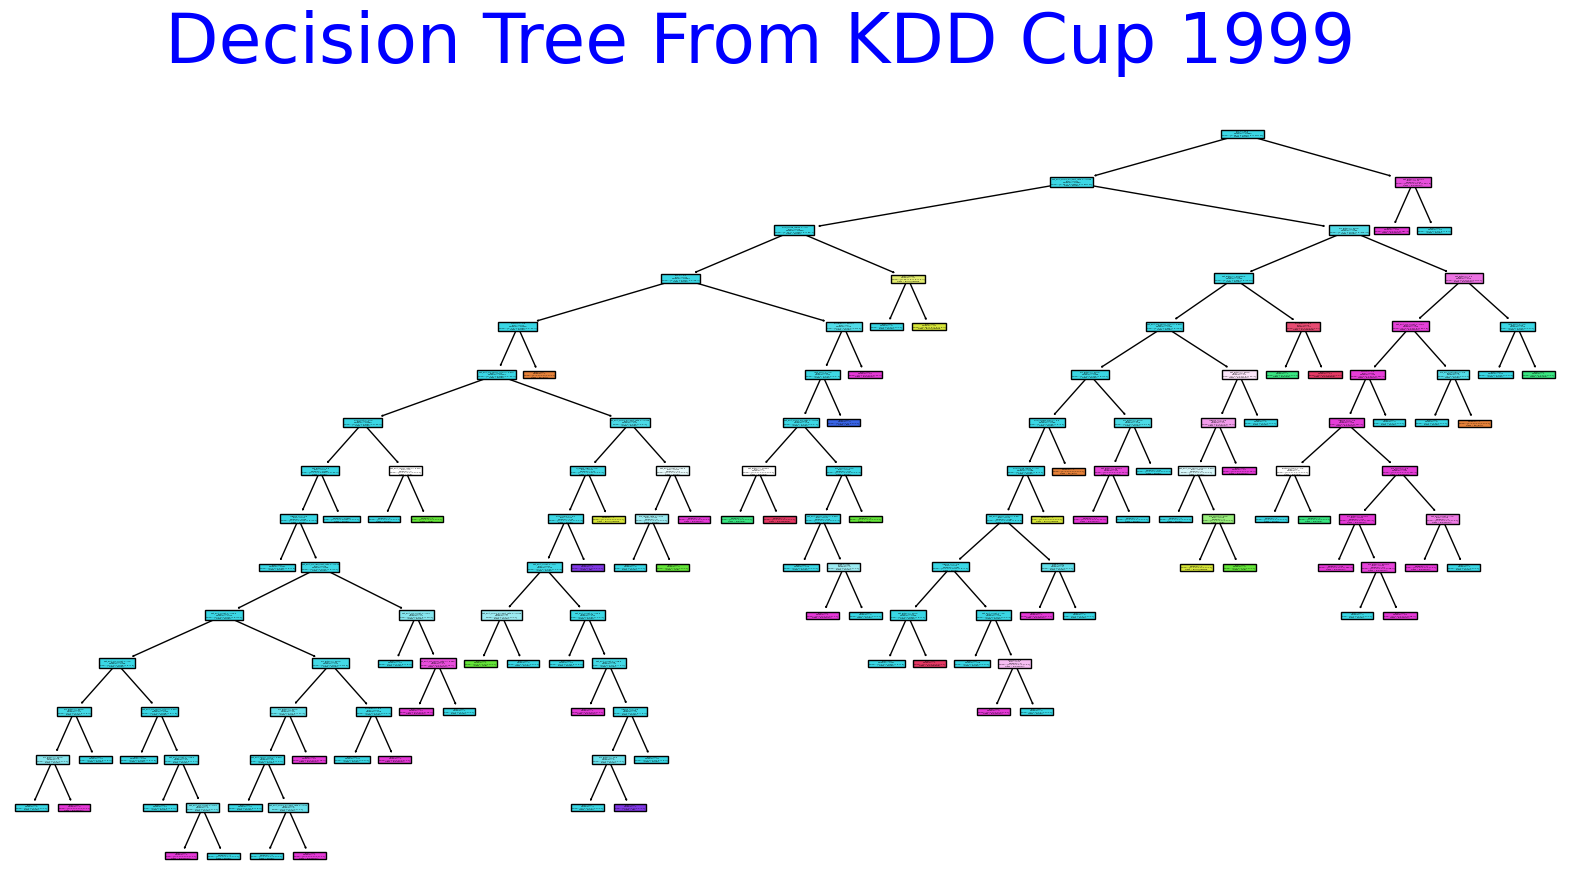

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# One-hot encode the categorical features
X_r2l_encoded_df1 = pd.get_dummies(X_r2l_df1)

# Now split the data into training and testing sets
X_train_r2l_df1, X_test_r2l_df1, y_train_r2l_df1, y_test_r2l_df1 = train_test_split(X_r2l_encoded_df1, y_r2l_df1, test_size=0.3, random_state=42)

# Define the model
#model_df1 = DecisionTreeClassifier(max_leaf_nodes=10)
model_df1 = DecisionTreeClassifier()

# Perform 10-fold cross-validation
cv_scores_df1 = cross_val_score(model_df1, X_train_r2l_df1, y_train_r2l_df1, cv=10, scoring='accuracy')

# Print the mean accuracy of the model across all folds
print(f"Cross-Validation Accuracy df1: {cv_scores_df1.mean():2f}")

# Fit the model on the entire training set
model_df1.fit(X_train_r2l_df1, y_train_r2l_df1)

# Predict on the test set
y_pred_r2l_df1 = model_df1.predict(X_test_r2l_df1)
y_pred_r2l_df1_proba = model_df1.predict_proba(X_test_r2l_df1)[:, 1]


# Calculate the accuracy on the test set
accuracy_r2l_df1 = accuracy_score(y_test_r2l_df1, y_pred_r2l_df1)
print(f"Accuracy of R2L attacks for df1: {accuracy_r2l_df1:2f}")

# Decision tree plot
plt.figure(figsize=(20, 10))
ax = plt.axes()
class_names = model_df1.classes_.tolist()
plot_tree(model_df1, filled=True, feature_names=X_train_r2l_df1.columns, class_names=class_names)
plt.suptitle("Decision Tree From KDD Cup 1999", fontsize=50, color='blue')
plt.show()

In [ ]:
model_df1.get_depth()

15

In [ ]:
model_df1.get_n_leaves()

76

## **df2**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Accuracy df2: 0.998683
Accuracy of R2L attacks for df2: 0.998293


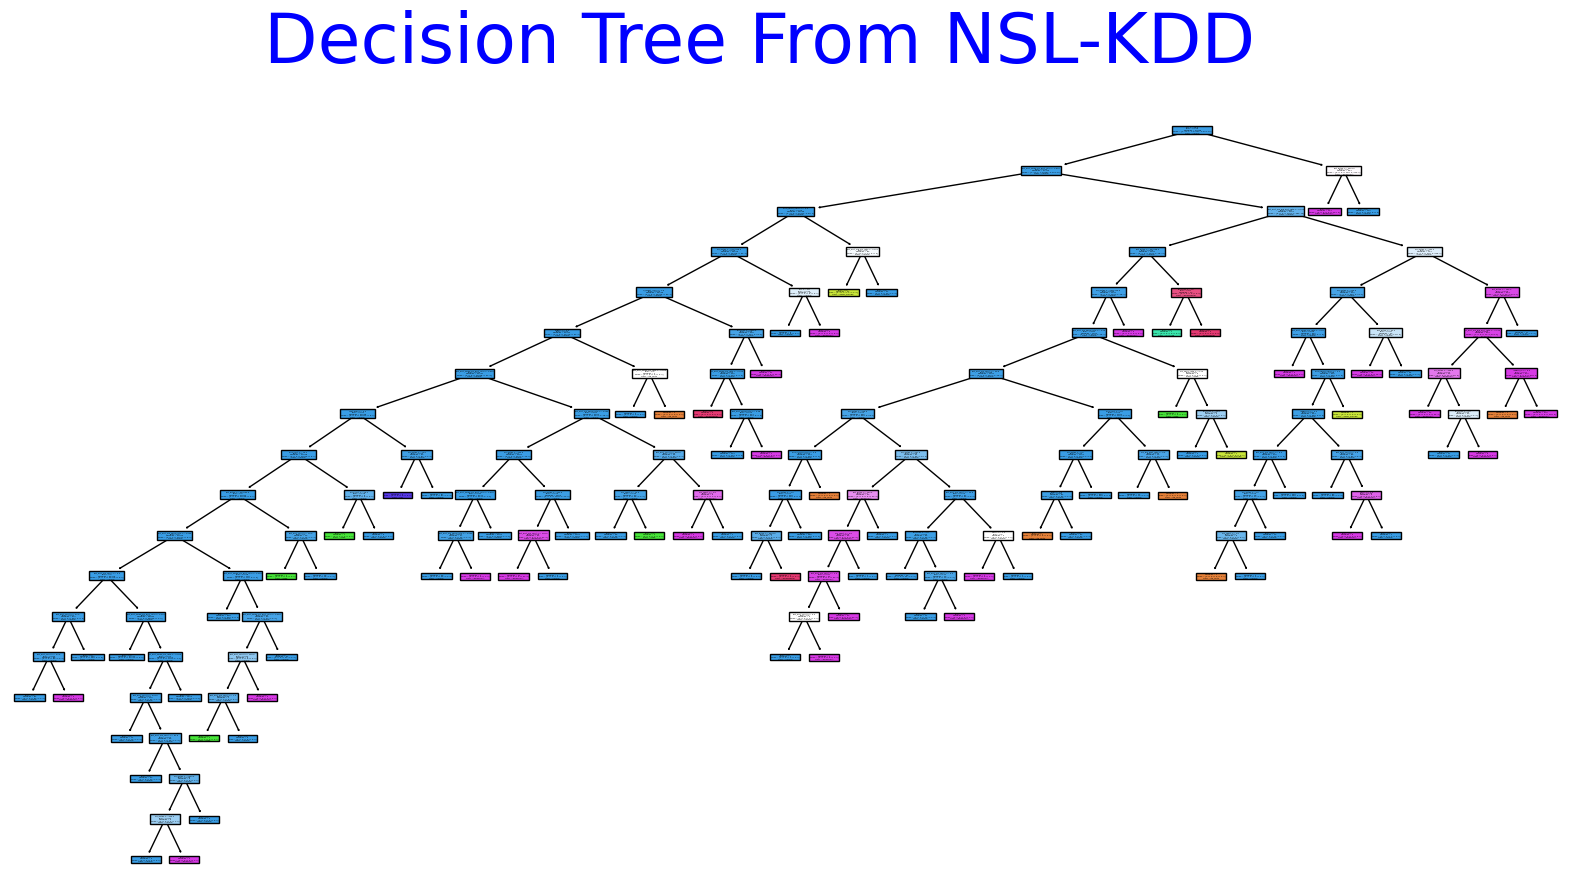

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# One-hot encode the categorical features
X_r2l_encoded_df2 = pd.get_dummies(X_r2l_df2)

# Now split the data into training and testing sets
X_train_r2l_df2, X_test_r2l_df2, y_train_r2l_df2, y_test_r2l_df2 = train_test_split(X_r2l_encoded_df2, y_r2l_df2, test_size=0.3, random_state=42)

# Define the model
#model_df2 = DecisionTreeClassifier(max_leaf_nodes=10)
model_df2 = DecisionTreeClassifier()

# Perform 10-fold cross-validation
cv_scores_df2 = cross_val_score(model_df2, X_train_r2l_df2, y_train_r2l_df2, cv=10, scoring='accuracy')

# Print the mean accuracy of the model across all folds
print(f"Cross-Validation Accuracy df2: {cv_scores_df2.mean():2f}")

# Fit the model on the entire training set
model_df2.fit(X_train_r2l_df2, y_train_r2l_df2)

# Predict on the test set
y_pred_r2l_df2 = model_df2.predict(X_test_r2l_df2)
y_pred_r2l_df2_proba = model_df2.predict_proba(X_test_r2l_df1)[:, 1]

# Calculate the accuracy on the test set
accuracy_r2l_df2 = accuracy_score(y_test_r2l_df2, y_pred_r2l_df2)
print(f"Accuracy of R2L attacks for df2: {accuracy_r2l_df2:2f}")

# Decision tree plot
plt.figure(figsize=(20, 10))
ax = plt.axes()
class_names2 = model_df2.classes_.tolist()
plot_tree(model_df2, filled=True, feature_names=X_train_r2l_df1.columns, class_names=class_names2)
plt.suptitle("Decision Tree From NSL-KDD", fontsize=50, color='blue')
plt.show()

In [ ]:
model_df2.get_depth()

18

In [ ]:
model_df2.get_n_leaves()

85

## **combined_df**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Accuracy combined_df: 0.999187
Accuracy of R2L attacks for combined_df: 0.999323


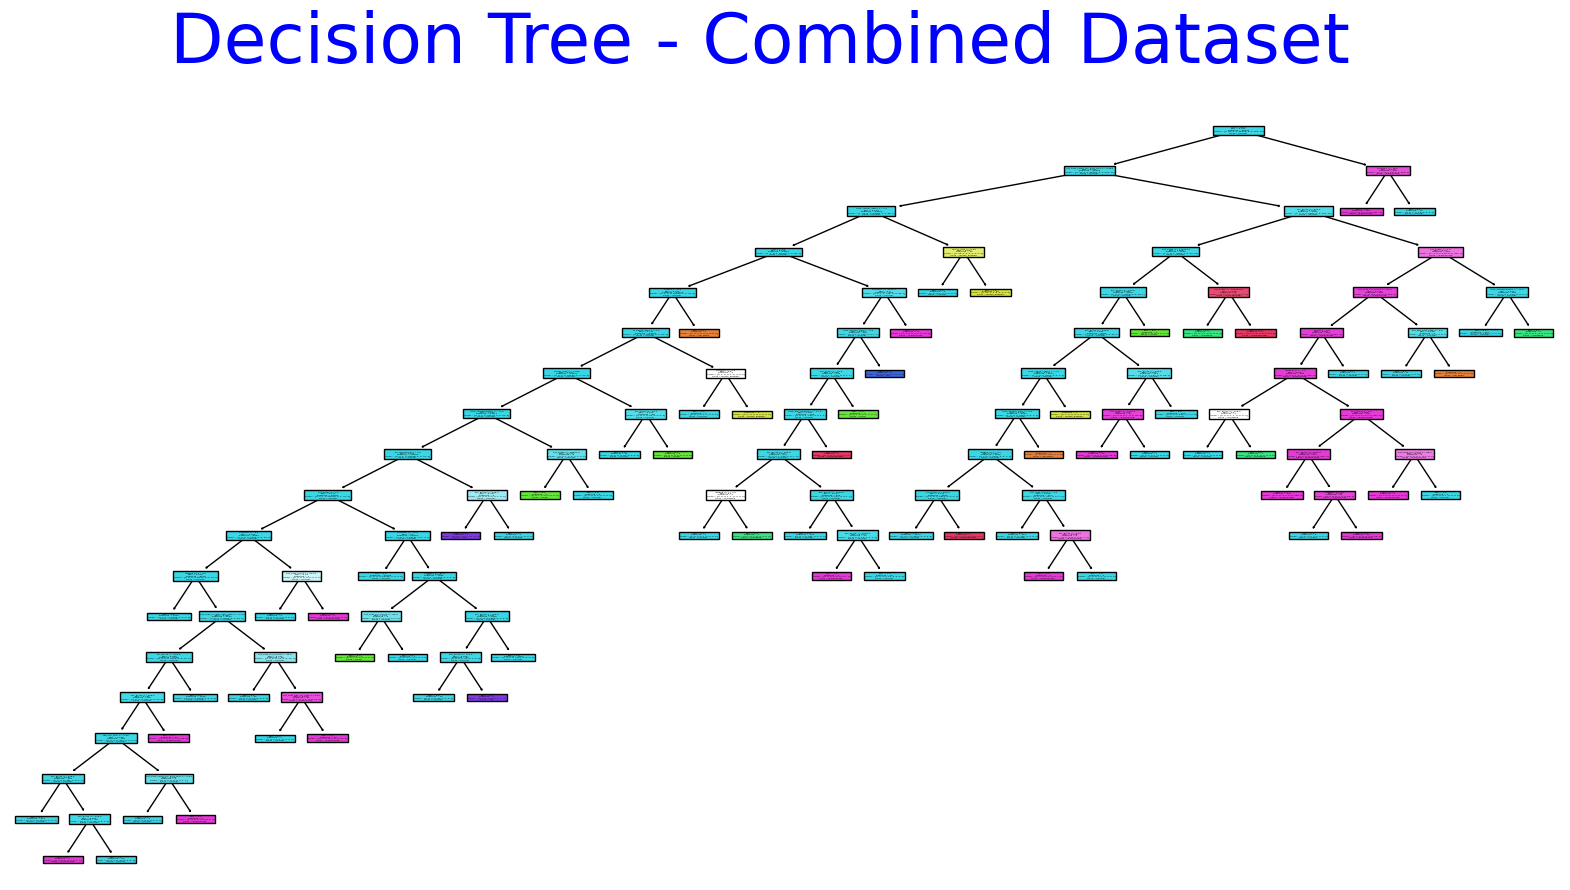

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# One-hot encode the categorical features
X_r2l_encoded_combined_df = pd.get_dummies(X_r2l_combined_df)

# Now split the data into training and testing sets
X_train_r2l_combined_df, X_test_r2l_combined_df, y_train_r2l_combined_df, y_test_r2l_combined_df = train_test_split(X_r2l_encoded_combined_df, y_r2l_combined_df, test_size=0.3, random_state=42)

# Define the model
#model_combined_df = DecisionTreeClassifier(max_leaf_nodes=10)
model_combined_df = DecisionTreeClassifier()

# Perform 10-fold cross-validation
cv_scores_combined_df = cross_val_score(model_combined_df, X_train_r2l_combined_df, y_train_r2l_combined_df, cv=10, scoring='accuracy')

# Print the mean accuracy of the model across all folds
print(f"Cross-Validation Accuracy combined_df: {cv_scores_combined_df.mean():2f}")

# Fit the model on the entire training set
model_combined_df.fit(X_train_r2l_combined_df, y_train_r2l_combined_df)

# Predict on the test set
y_pred_r2l_combined_df = model_combined_df.predict(X_test_r2l_combined_df)
#y_pred_r2l_combined_df_proba = model_combined_df.predict_proba(X_test_r2l_combined_df)[:, 1]

# Calculate the accuracy on the test set
accuracy_r2l_combined_df = accuracy_score(y_test_r2l_combined_df, y_pred_r2l_combined_df)
print(f"Accuracy of R2L attacks for combined_df: {accuracy_r2l_combined_df:2f}")

# Decision tree plot
plt.figure(figsize=(20, 10))
ax = plt.axes()
class_names3 = model_combined_df.classes_.tolist()
plot_tree(model_combined_df, filled=True, feature_names=X_train_r2l_combined_df.columns, class_names=class_names3)
plt.suptitle("Decision Tree - Combined Dataset", fontsize=50, color='blue')
plt.show()

In [ ]:
model_combined_df.get_depth()

18

In [ ]:
model_combined_df.get_n_leaves()

66

# **Cross-Validation Accuracy Comparison**

In [ ]:
print(f"Cross-Validation Accuracy df1: {cv_scores_df1.mean():2f}")
print(f"Cross-Validation Accuracy df2: {cv_scores_df2.mean():2f}")
print(f"Cross-Validation Accuracy combined_df: {cv_scores_combined_df.mean():2f}")

print(f"Accuracy of R2L attacks for df1: {accuracy_r2l_df1:2f}")
print(f"Accuracy of R2L attacks for df2: {accuracy_r2l_df2:2f}")
print(f"Accuracy of R2L attacks for combined_df: {accuracy_r2l_combined_df:2f}")

Cross-Validation Accuracy df1: 0.998969
Cross-Validation Accuracy df2: 0.998683
Cross-Validation Accuracy combined_df: 0.999187
Accuracy of R2L attacks for df1: 0.999187
Accuracy of R2L attacks for df2: 0.998293
Accuracy of R2L attacks for combined_df: 0.999323


# **Classification Report**

## **df1**

In [ ]:
# Classification Report: A Classification report is used to measure the quality of predictions from a classification algorithm. It shows the precision, recall, F1, and support scores for the model.
from sklearn.metrics import classification_report

# Print the classification report
print(f"Classification Report for KDD-Cup 1999")
print(classification_report(y_test_r2l_df1, y_pred_r2l_df1, zero_division=0))

Classification Report for KDD-Cup 1999
               precision    recall  f1-score   support

   ftp_write.       0.67      0.40      0.50         5
guess_passwd.       1.00      1.00      1.00        17
        imap.       1.00      0.67      0.80         3
    multihop.       0.33      0.67      0.44         3
      normal.       1.00      1.00      1.00     29172
         phf.       1.00      1.00      1.00         1
 warezclient.       0.97      0.99      0.98       314
 warezmaster.       1.00      0.71      0.83         7

     accuracy                           1.00     29522
    macro avg       0.87      0.80      0.82     29522
 weighted avg       1.00      1.00      1.00     29522



## **df2**

In [ ]:
# Print the classification report
print(f"Classification Report for NSL-KDD")
print(classification_report(y_test_r2l_df2, y_pred_r2l_df2, zero_division=0))

Classification Report for NSL-KDD
              precision    recall  f1-score   support

   ftp_write       1.00      1.00      1.00         1
guess_passwd       1.00      0.89      0.94         9
        imap       0.67      1.00      0.80         4
    multihop       0.00      0.00      0.00         6
      normal       1.00      1.00      1.00     20196
         phf       1.00      1.00      1.00         1
         spy       0.00      0.00      0.00         2
 warezclient       0.96      0.96      0.96       275
 warezmaster       0.70      0.88      0.78         8

    accuracy                           1.00     20502
   macro avg       0.70      0.75      0.72     20502
weighted avg       1.00      1.00      1.00     20502



## **combined_df**

In [ ]:
# Print the classification report
print(f"Classification Report for Combined Dataset")
print(classification_report(y_test_r2l_combined_df, y_pred_r2l_combined_df, zero_division=0))

Classification Report for Combined Dataset
               precision    recall  f1-score   support

   ftp_write.       0.67      0.40      0.50         5
guess_passwd.       0.94      1.00      0.97        17
        imap.       0.33      0.33      0.33         3
    multihop.       0.50      0.67      0.57         3
      normal.       1.00      1.00      1.00     29172
         phf.       1.00      1.00      1.00         1
 warezclient.       0.98      1.00      0.99       314
 warezmaster.       1.00      0.71      0.83         7

     accuracy                           1.00     29522
    macro avg       0.80      0.76      0.77     29522
 weighted avg       1.00      1.00      1.00     29522



# **Detection Rate and False Alarm Rate**


## **df1**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predictions on test set
y_pred_r2l_df1 = model_df1.predict_proba(X_test_r2l_df1)[:, 1] # Use the probability for the positive class

# Calculate confusion matrix
conf_matrix_df1 = confusion_matrix(y_test_r2l_df1, model_df1.predict(X_test_r2l_df1)) # Use the predicted labels, not probabilities

# Extract true positive, false positive, true negative, and false negative rates
tn_df1, fp_df1, fn_df1, tp_df1 = conf_matrix_df1.ravel()

# Calculate detection rate (True Positive Rate)
detection_rate_df1 = tp_df1 / (tp_df1 + fn_df1)

# Calculate false alarm rate (False Positive Rate)
false_alarm_rate_df1 = fp_df1 / (fp_df1 + tn_df1)

# Compute ROC curve for the positive class
fpr_df1, tpr_df1, _ = roc_curve(y_test_r2l_df1, y_pred_r2l_df1) # Use the probability for the positive class
roc_auc_df1 = auc(fpr_df1, tpr_df1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_df1, tpr_df1, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc_df1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('df1 ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print detection rate and false alarm rate
print(f"Detection Rate (True Positive Rate): {detection_rate_df1:.2f}")
print(f"False Alarm Rate (False Positive Rate): {false_alarm_rate_df1:.2f}")

ValueError: too many values to unpack (expected 4)

## **df2**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predictions on test set
y_pred_r2l_df2 = model_df2.predict(X_test_r2l_df2)

# Calculate confusion matrix
conf_matrix_df2 = confusion_matrix(y_test_r2l_df2, y_pred_r2l_df2)

# Extract true positive, false positive, true negative, and false negative rates
tn_df2, fp_df2, fn_df2, tp_df2 = conf_matrix_df2.ravel()

# Calculate detection rate (True Positive Rate)
detection_rate_df2 = tp_df2 / (tp_df2 + fn_df2)

# Calculate false alarm rate (False Positive Rate)
false_alarm_rate_df2 = fp_df2/ (fp_df2 + tn_df2)

# Compute ROC curve
fpr_df2, tpr_df2, _ = roc_curve(y_test_r2l_df2, model_df2.predict_proba(X_test_r2l_df2)[:, 1])
roc_auc_df2 = auc(fpr_df2, tpr_df2)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_df2, tpr_df2, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc_df2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print detection rate and false alarm rate
print(f"Detection Rate (True Positive Rate): {detection_rate_df2:.2f}")
print(f"False Alarm Rate (False Positive Rate): {false_alarm_rate_df2:.2f}")

ValueError: too many values to unpack (expected 4)

## **combined_df**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predictions on test set
y_pred_r2l_combined_df = model_combined_df.predict(X_test_r2l_combined_df)

# Calculate confusion matrix
conf_matrix_combined_df = confusion_matrix(y_test_r2l_combined_df, y_pred_r2l_combined_df)

# Extract true positive, false positive, true negative, and false negative rates
tn_combined_df, fp_combined_df, fn_combined_df, tp_combined_df = conf_matrix_combined_df.ravel()

# Calculate detection rate (True Positive Rate)
detection_rate_combined_df = tp_combined_df / (tp_combined_df + fn_combined_df)

# Calculate false alarm rate (False Positive Rate)
false_alarm_rate_combined_df = fp_combined_df/ (fp_combined_df + tn_combined_df)

# Compute ROC curve
fpr_combined_df, tpr_combined_df, _ = roc_curve(y_test_r2l_combined_df, model_combined_df.predict(X_test_r2l_combined_df)[:, 1])
roc_auc_combined_df = auc(fpr_combined_df, tpr_combined_df)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_combined_df, tpr_combined_df, color='b', lw=2, label=f'ROC curve AUC =  {roc_auc_combined_df:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined Datasets ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print detection rate and false alarm rate
print(f"Detection Rate (True Positive Rate): {detection_rate_combined_df:.2f}")
print(f"False Alarm Rate (False Positive Rate): {false_alarm_rate_combined_df:.2f}")

ValueError: too many values to unpack (expected 4)

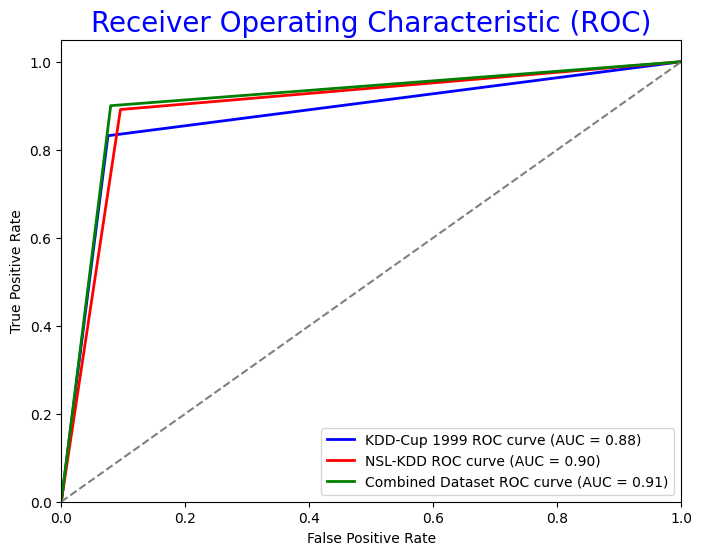

KDD-CUP 1999
Cross-Validation Accuracy: 0.998969
Accuracy of R2L attacks: 0.999187
Detection Rate (True Positive Rate): 0.83
False Alarm Rate (False Positive Rate): 0.08
----------------------------------------------------------------------
NSL-KDD
Cross-Validation Accuracy: 0.998683
Accuracy of R2L attacks: 0.998293
Detection Rate (True Positive Rate): 0.89
False Alarm Rate (False Positive Rate): 0.10
----------------------------------------------------------------------
Combined Dataset
Cross-Validation Accuracy combined_df: 0.999187
Accuracy of R2L attacks for combined_df: 0.999323
Detection Rate (True Positive Rate): 0.90
False Alarm Rate (False Positive Rate): 0.08
----------------------------------------------------------------------


In [ ]:
plt.figure(figsize=(8, 6))

# Plot ROC curve for dataset 1
plt.plot(fpr_df1, tpr_df1, color='b', lw=2, label=f'KDD-Cup 1999 ROC curve (AUC = {roc_auc_df1:.2f})')

# Plot ROC curve for dataset 2
plt.plot(fpr_df2, tpr_df2, color='r', lw=2, label=f'NSL-KDD ROC curve (AUC = {roc_auc_df2:.2f})')

# Plot combined detection rate and false alarm rate
plt.plot(fpr_combined_df, tpr_combined_df, color='g', lw=2, label=f'Combined Dataset ROC curve (AUC = {roc_auc_combined_df:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize=20, color='blue')
plt.legend(loc='lower right')
plt.show()


# Print detection rate and false alarm rate
print("KDD-CUP 1999")
print(f"Cross-Validation Accuracy: {cv_scores_df1.mean():2f}")
print(f"Accuracy of R2L attacks: {accuracy_r2l_df1:2f}")
print(f"Detection Rate (True Positive Rate): {detection_rate_df1:.2f}")
print(f"False Alarm Rate (False Positive Rate): {false_alarm_rate_df1:.2f}")
print("----------------------------------------------------------------------")

print("NSL-KDD")
print(f"Cross-Validation Accuracy: {cv_scores_df2.mean():2f}")
print(f"Accuracy of R2L attacks: {accuracy_r2l_df2:2f}")
print(f"Detection Rate (True Positive Rate): {detection_rate_df2:.2f}")
print(f"False Alarm Rate (False Positive Rate): {false_alarm_rate_df2:.2f}")
print("----------------------------------------------------------------------")

print("Combined Dataset")
print(f"Cross-Validation Accuracy combined_df: {cv_scores_combined_df.mean():2f}")
print(f"Accuracy of R2L attacks for combined_df: {accuracy_r2l_combined_df:2f}")
print(f"Detection Rate (True Positive Rate): {detection_rate_combined_df:.2f}")
print(f"False Alarm Rate (False Positive Rate): {false_alarm_rate_combined_df:.2f}")
print("----------------------------------------------------------------------")
